# 14 Data Analytics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')

# Join Table Basic

In [2]:
df1=pd.DataFrame({'a':[2,3,4,5],'b':[3,2,2,4]})
df1

,a,b
0,2,3
1,3,2
2,4,2
3,5,4


In [3]:
df2=pd.DataFrame({'x':[1,2,3],'y':[10,20,30]})
df2

,x,y
0,1,10
1,2,20
2,3,30


In [4]:
# Start with df1
df1.merge(right=df2,left_on='b',right_on='x',how='inner')

,a,b,x,y
0,2,3,3,30
1,3,2,2,20
2,4,2,2,20


In [5]:
# Start with df2
df2.merge(right=df1,left_on='x',right_on='b',how='inner')

,x,y,a,b
0,2,20,3,2
1,2,20,4,2
2,3,30,2,3


In [6]:
# Outer join
df1.merge(right=df2,left_on='b',right_on='x',how='outer')

,a,b,x,y
0,2.0,3.0,3.0,30.0
1,3.0,2.0,2.0,20.0
2,4.0,2.0,2.0,20.0
3,5.0,4.0,NaN,NaN
4,NaN,NaN,1.0,10.0


# Read data

In [7]:
df_sku=pd.read_csv('bakery_sku.csv')
df_payment=pd.read_csv('bakery_payment.csv')
df_transaction=pd.read_csv('bakery_transaction.csv')

# Data Exploration

In [8]:
df_sku.head()

,id,item
0,0,Adjustment
1,1,Afternoon with the baker
2,2,Alfajores
3,3,Argentina Night
4,4,Art Tray


In [9]:
df_payment.head(3)

,id,transaction,item
0,0,1,11
1,1,2,75
2,2,2,75


In [10]:
df_transaction.head(3)

,id,date,time
0,1,2016-10-30,09:58:11
1,2,2016-10-30,10:05:34
2,3,2016-10-30,10:07:57


# Join Table

In [11]:
df=df_sku.merge(df_payment,how='inner',left_on='id',right_on='item')\
    .merge(df_transaction,how='inner',left_on='transaction',right_on='id')\
    .sort_values('id_y')\
    .set_index('id_y')\
    .reset_index()\
    .drop(['item_y','id','id_y'],axis=1)\
    .rename(columns={'item_x':'item','id_x':'item_code'})

In [12]:
df.head()

,item_code,item,transaction,date,time
0,11,Bread,1,2016-10-30,09:58:11
1,75,Scandinavian,2,2016-10-30,10:05:34
2,75,Scandinavian,2,2016-10-30,10:05:34
3,48,Hot chocolate,3,2016-10-30,10:07:57
4,49,Jam,3,2016-10-30,10:07:57


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_code    21293 non-null  int64 
 1   item         21293 non-null  object
 2   transaction  21293 non-null  int64 
 3   date         21293 non-null  object
 4   time         21293 non-null  object
dtypes: int64(2), object(3)
memory usage: 831.9+ KB


# Datatime Conversion

In [14]:
df['date'] + ' ' + df['time']

0        2016-10-30 09:58:11
1        2016-10-30 10:05:34
2        2016-10-30 10:05:34
3        2016-10-30 10:07:57
4        2016-10-30 10:07:57
                ...         
21288    2017-04-09 14:32:58
21289    2017-04-09 14:32:58
21290    2017-04-09 14:57:06
21291    2017-04-09 14:57:06
21292    2017-04-09 15:04:24
Length: 21293, dtype: object

In [15]:
df['datetime']=pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df.drop(['date','time'],axis=1,inplace=True)

#df['item_cat']=df.item.astype('category').cat.codes

In [16]:
df.head()

,item_code,item,transaction,datetime
0,11,Bread,1,2016-10-30 09:58:11
1,75,Scandinavian,2,2016-10-30 10:05:34
2,75,Scandinavian,2,2016-10-30 10:05:34
3,48,Hot chocolate,3,2016-10-30 10:07:57
4,49,Jam,3,2016-10-30 10:07:57


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   item_code    21293 non-null  int64         
 1   item         21293 non-null  object        
 2   transaction  21293 non-null  int64         
 3   datetime     21293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 665.5+ KB


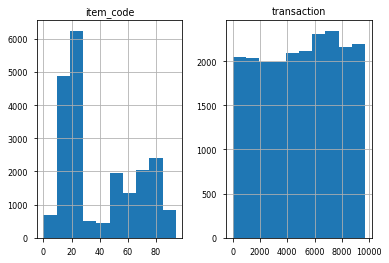

In [18]:
df.hist();

# Extract information from Datetime

In [19]:
#The day of the week with Monday=0, Sunday=6.
df['dayofweek']=df.datetime.dt.dayofweek

#Month Jan=1, Dec=12
df['month']=df.datetime.dt.month

#Hour 00:00 to 23:00
df['hour']=df.datetime.dt.hour

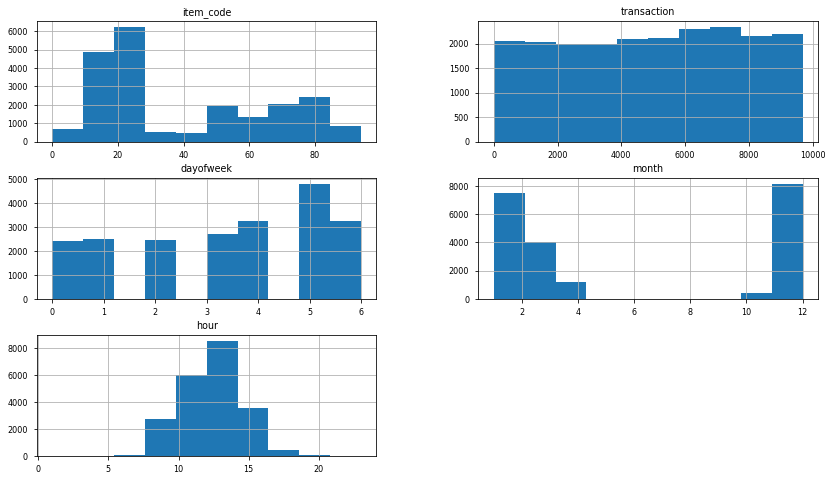

In [20]:
df.hist(figsize=(14,8));

In [21]:
df.head()

,item_code,item,transaction,datetime,dayofweek,month,hour
0,11,Bread,1,2016-10-30 09:58:11,6,10,9
1,75,Scandinavian,2,2016-10-30 10:05:34,6,10,10
2,75,Scandinavian,2,2016-10-30 10:05:34,6,10,10
3,48,Hot chocolate,3,2016-10-30 10:07:57,6,10,10
4,49,Jam,3,2016-10-30 10:07:57,6,10,10


In [ ]:
# Groupby

In [22]:
df2=df.groupby(by=['dayofweek','month','hour','item_code'])\
    .size().reset_index(name='counts')
df2

,dayofweek,month,hour,item_code,counts
0,0,1,8,11,4
1,0,1,8,23,2
2,0,1,8,66,1
3,0,1,8,76,1
4,0,1,9,1,1
...,...,...,...,...,...
6388,6,12,16,11,1
6389,6,12,16,23,3
6390,6,12,16,26,2
6391,6,12,16,84,1


# Correlation Matrix

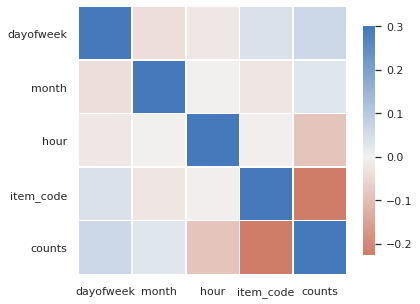

In [23]:
import seaborn as sns
sns.set_theme(style="white")
corr = df2.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette( 20, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7});

In [24]:
df2.to_csv('week15/bakery.csv')